# Hi! Welcome to my VAR Model Tutorial!

I was struggling to learn how to fit a VAR in Python, so I really decided to make this tutorial so people don't struggle like I did. #scale #share #benice

# # First, let's import the libraries and functions we are going to need

In [3]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

If you encounter any error like 
"
ImportErrorTraceback (most recent call last)
<ipython-input-40-56b09edbbfb5> in <module>()
----> 1 import xxx

ImportError: No module named ana
",
it means that one or more of the libraries you are trying to install, is not install.

Two options, in that case:

*on the terminal, run pip install 'name of the package that appeared after the "No module named" phrase
*if that does not work, on this notebook run !pip install name_of_package

# Now, let's import some sample data

We have to transform the data we loaded into a data frame. As a rule of thumb, if you are a begginer in Python, you will only be able to do fun stuff if you place your data in a data.frame. Memorize this command!

In [4]:
mdata = sm.datasets.macrodata.load_pandas().data

We will be using some sample pandas data! If you have your own dataframe, feel free to use it in this tutorial

In [10]:
data=pandas.DataFrame(mdata)

I always run the head command to make sure everything is all right with the data. Also, we can take a look at what is data like

In [11]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Ok, now we are good to go! 
# First, lets select the variables we want to run in our VAR

In [14]:
mdata = data[['realgdp','realcons','realinv']]

In order to run the VAR model, we have to provide an index object. An index object is the object that has the dates sequence. If you dont have this object, Python will not know the order of the dates and will not be abble to run anything!

The first command bellow, is simply separating the two coluns of data in your dataset into one.

Next comman creates a variable like YEARQ1 (ex: 2016Q1), simply to improbe the format. I used the print command so you could check the result out.

In [24]:
dates = data[['year', 'quarter']].astype(int).astype(str)

In [32]:
quartely = dates["year"] + "Q" + dates["quarter"]
print(quartely)

0      1959Q1
1      1959Q2
2      1959Q3
3      1959Q4
4      1960Q1
5      1960Q2
6      1960Q3
7      1960Q4
8      1961Q1
9      1961Q2
10     1961Q3
11     1961Q4
12     1962Q1
13     1962Q2
14     1962Q3
15     1962Q4
16     1963Q1
17     1963Q2
18     1963Q3
19     1963Q4
20     1964Q1
21     1964Q2
22     1964Q3
23     1964Q4
24     1965Q1
25     1965Q2
26     1965Q3
27     1965Q4
28     1966Q1
29     1966Q2
        ...  
173    2002Q2
174    2002Q3
175    2002Q4
176    2003Q1
177    2003Q2
178    2003Q3
179    2003Q4
180    2004Q1
181    2004Q2
182    2004Q3
183    2004Q4
184    2005Q1
185    2005Q2
186    2005Q3
187    2005Q4
188    2006Q1
189    2006Q2
190    2006Q3
191    2006Q4
192    2007Q1
193    2007Q2
194    2007Q3
195    2007Q4
196    2008Q1
197    2008Q2
198    2008Q3
199    2008Q4
200    2009Q1
201    2009Q2
202    2009Q3
dtype: object


Next, we need to implant a command that convert the string we created into datetime variables.

In [33]:
from statsmodels.tsa.base.datetools import dates_from_str


In [34]:
quartely=dates_from_str(quartely)
print(quartely)

[datetime.datetime(1959, 3, 31, 0, 0), datetime.datetime(1959, 6, 30, 0, 0), datetime.datetime(1959, 9, 30, 0, 0), datetime.datetime(1959, 12, 31, 0, 0), datetime.datetime(1960, 3, 31, 0, 0), datetime.datetime(1960, 6, 30, 0, 0), datetime.datetime(1960, 9, 30, 0, 0), datetime.datetime(1960, 12, 31, 0, 0), datetime.datetime(1961, 3, 31, 0, 0), datetime.datetime(1961, 6, 30, 0, 0), datetime.datetime(1961, 9, 30, 0, 0), datetime.datetime(1961, 12, 31, 0, 0), datetime.datetime(1962, 3, 31, 0, 0), datetime.datetime(1962, 6, 30, 0, 0), datetime.datetime(1962, 9, 30, 0, 0), datetime.datetime(1962, 12, 31, 0, 0), datetime.datetime(1963, 3, 31, 0, 0), datetime.datetime(1963, 6, 30, 0, 0), datetime.datetime(1963, 9, 30, 0, 0), datetime.datetime(1963, 12, 31, 0, 0), datetime.datetime(1964, 3, 31, 0, 0), datetime.datetime(1964, 6, 30, 0, 0), datetime.datetime(1964, 9, 30, 0, 0), datetime.datetime(1964, 12, 31, 0, 0), datetime.datetime(1965, 3, 31, 0, 0), datetime.datetime(1965, 6, 30, 0, 0), datet

Now, what we have to do is to create the datetime index!

In [43]:
mdata.index = pandas.DatetimeIndex(quarterly)

# Ok, done! Let's create the VAR!

In the first command, we are actually telling Python to create the VAR model.

In [44]:
model=VAR(mdata)

But now we have to tell VAR what will be our model lag!

In [45]:
results = model.fit(2) #the number in parenthesis is the lag!

In [46]:
results.summary() #this returns the VAR equation and coefficients!

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Apr, 2017
Time:                     18:07:11
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.3676
Nobs:                     201.000    HQIC:                   20.1621
Log likelihood:          -2846.88    FPE:                4.96244e+08
AIC:                      20.0225    Det(Omega_mle):     4.47809e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              24.839339        18.300864            1.357           0.176
L1.realgdp          0.491262         0.151347            3.246           0.001
L1.realcons         1.494143         0.178426            8.374    

# Let's do some fun graphs now!

There is one little trick here (or, as we say in Brazil, "uma pegadinha!"). If you are not used to Python, you will probably would be very frustrated for a few moments before finding out what to do.
The thing is that, by defacult, iPython notebook does not display graphs on its console. It just displays tabs.
Also, many graphs are run by the matplotlib. So, in that case, we will do two things:

* Import the matplotlib
* Tell iPython notebook that we want it to display things here in the console.

Let's?

In [73]:
import matplotlib #this is us importing matplotlib
%matplotlib inline #this is us telling that 

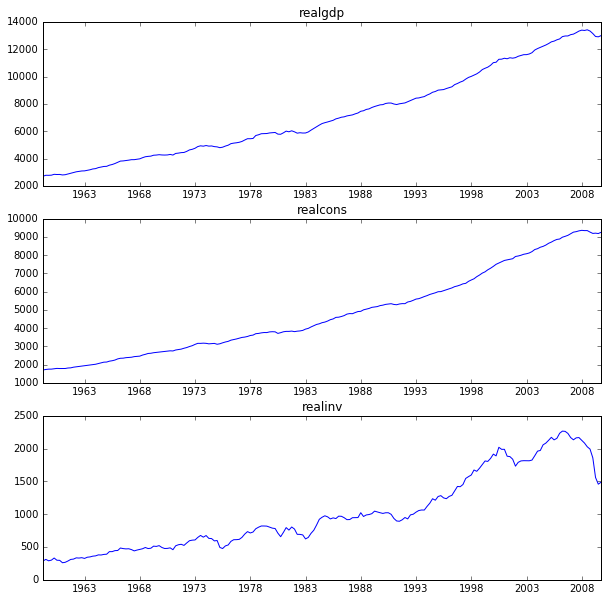

In [84]:
results.plot() #this plots out the timeseries
import matplotlib.pyplot as plt
plt.savefig('foo2.png')

In [81]:
import matplotlib
%matplotlib inline